In [1]:
import pandas as pd
import math
import nltk

In [2]:
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

In [57]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer

In [4]:
df = pd.read_csv("MCDONALD.csv", encoding='latin1')
df.head()

,reviews,rating
0,The person who took my order was not very frie...,3 stars
1,I love your coffee,5 stars
2,"I did not like the format of the store, the ba...",3 stars
3,Rico and his hot and delicious muffin sausages...,5 stars
4,Bad service and they always forget to put the ...,1 star


In [5]:
df.shape

(1000, 2)

In [6]:
print(df['rating'].isnull().sum())

0


In [55]:
df['rating_num'] = df['rating'].str.extract('(\\d)').astype(int)

def convert_rating_to_label(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df['label'] = df['rating_num'].apply(convert_rating_to_label)

In [8]:
df.head()

,reviews,rating,rating_num,label
0,The person who took my order was not very frie...,3 stars,3,Neutral
1,I love your coffee,5 stars,5,Positive
2,"I did not like the format of the store, the ba...",3 stars,3,Neutral
3,Rico and his hot and delicious muffin sausages...,5 stars,5,Positive
4,Bad service and they always forget to put the ...,1 star,1,Negative


In [18]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    lower_text = text.lower()
    no_punctuation = "".join([i for i in lower_text if i not in string.punctuation])
    tokens = word_tokenize(no_punctuation)
    filtered = [i for i in tokens if i not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return lemmatized

df['tokens'] = df['reviews'].apply(preprocess)

In [20]:
df.head()

,reviews,rating,rating_num,label,tokens
0,The person who took my order was not very frie...,3 stars,3,Neutral,"[person, took, order, friendly, hadnt, even, f..."
1,I love your coffee,5 stars,5,Positive,"[love, coffee]"
2,"I did not like the format of the store, the ba...",3 stars,3,Neutral,"[like, format, store, bathroom, kept, closed]"
3,Rico and his hot and delicious muffin sausages...,5 stars,5,Positive,"[rico, hot, delicious, muffin, sausage, always..."
4,Bad service and they always forget to put the ...,1 star,1,Negative,"[bad, service, always, forget, put, complete, ..."


In [22]:
vocab = set()
for tokens in df['tokens']:
   vocab.update(tokens)
vocab = list(vocab)

In [24]:
vocab

['admirable',
 'hit',
 'spitting',
 'chain',
 'figured',
 'misleading',
 'wall',
 '615',
 'indignant',
 'apologize',
 'torn',
 'tummy',
 'entre',
 'clerk',
 'guest',
 'laughing',
 'current',
 'obligatory',
 'smelly',
 'fried',
 'moron',
 'liar',
 'turning',
 'thanking',
 'card',
 'filet',
 'think',
 'swear',
 'overall',
 'opinion',
 'upbeat',
 'inprofessional',
 'voice',
 'child',
 'perspective',
 'male',
 'chik',
 'stear',
 'restroom',
 'drenched',
 'playplace',
 'took',
 'sticky',
 'extra',
 'based',
 'sock',
 'hitting',
 'wassup',
 'manure',
 'atmosphere',
 'tested',
 'police',
 'palm',
 'aaaah',
 'okay',
 'register',
 'winner',
 'ready',
 't9a',
 'legitimately',
 'friend',
 'answered',
 'arent',
 'locked',
 'olace',
 'stomp',
 'general',
 'pulled',
 'bag',
 'noticed',
 'garlic',
 'stoped',
 'six',
 'tag',
 'simply',
 'floating',
 '8',
 'drivetrue',
 'boyfriend',
 'okayhave',
 'burger',
 '552',
 'row',
 'however',
 'grapevine',
 'traffic',
 'laure',
 'install',
 'customized',
 'defi

In [26]:
def text_to_vector(tokens):
    vec = [0] * len(vocab)
    token_counts = Counter(tokens)
    for idx, word in enumerate(vocab):
        vec[idx] = token_counts[word]
    return vec

df['vector'] = df['tokens'].apply(text_to_vector)

In [28]:
df.head()

,reviews,rating,rating_num,label,tokens,vector
0,The person who took my order was not very frie...,3 stars,3,Neutral,"[person, took, order, friendly, hadnt, even, f...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,I love your coffee,5 stars,5,Positive,"[love, coffee]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"I did not like the format of the store, the ba...",3 stars,3,Neutral,"[like, format, store, bathroom, kept, closed]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Rico and his hot and delicious muffin sausages...,5 stars,5,Positive,"[rico, hot, delicious, muffin, sausage, always...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Bad service and they always forget to put the ...,1 star,1,Negative,"[bad, service, always, forget, put, complete, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [30]:
train_df = df.sample(frac=0.8, random_state=42).reset_index(drop=True)
test_df = df.drop(train_df.index).reset_index(drop=True)

In [32]:
pd.set_option("display.max_colwidth", None)

In [59]:
class_counts = Counter(train_df['label'])
class_counts

Counter({'Positive': 381, 'Negative': 311, 'Neutral': 108})

## NAIVE BAYES

In [40]:
class_counts = Counter(train_df['label'])
total_docs = len(train_df)
priors = {label: count / total_docs for label, count in class_counts.items()}


word_counts = {label: Counter() for label in class_counts}
for i, row in train_df.iterrows():
    word_counts[row['label']].update(row['tokens'])


total_words_per_class = {label: sum(words.values()) for label, words in word_counts.items()}

vocab = list(vocab)
vocab_size = len(vocab)


def predict_naive_bayes(tokens):
    scores = {}
    for label in class_counts:
        log_prob = math.log(priors[label])  
        for word in tokens:
            word_freq = word_counts[label][word]
            prob = (word_freq + 1) / (total_words_per_class[label] + vocab_size)
            log_prob += math.log(prob)
        scores[label] = log_prob
    return max(scores, key=scores.get)


test_df['nb_predicted'] = test_df['tokens'].apply(predict_naive_bayes)


accuracy = (test_df['nb_predicted'] == test_df['label']).mean()
print(f"\nNaive Bayes Accuracy (Based on PDF Logic): {round(accuracy * 100, 2)}%")


Naive Bayes Accuracy (Based on PDF Logic): 82.0%


## KNN

In [42]:
def cosine_distance(v1, v2):
    dot_product = sum(a * b for a, b in zip(v1, v2))
    norm1 = math.sqrt(sum(a * a for a in v1))
    norm2 = math.sqrt(sum(b * b for b in v2))
    if norm1 == 0 or norm2 == 0:
        return 1 
    return 1 - (dot_product / (norm1 * norm2))

In [44]:
def predict_sentiment_knn_test(vector, k=3):
    distances = []
    for i in train_df.index:
        dist = cosine_distance(vector, train_df.loc[i, 'vector'])
        distances.append((dist, train_df.loc[i, 'label']))
    neighbors = sorted(distances, key=lambda x: x[0])[:k]
    labels = [label for _, label in neighbors]
    most_common = Counter(labels).most_common(1)[0][0]
    return most_common


test_df['knn_predicted'] = test_df['vector'].apply(lambda vec: predict_sentiment_knn_test(vec, k=3))


knn_accuracy = (test_df['knn_predicted'] == test_df['label']).mean()
print(f"\nKNN Accuracy on Test Set: {round(knn_accuracy * 100, 2)}%")



KNN Accuracy on Test Set: 83.0%


## USER INPUT

In [48]:
user_input = input("\nEnter a customer review: ")

user_tokens = preprocess(user_input)

user_vector = text_to_vector(user_tokens)

nb_result = predict_naive_bayes(user_tokens)

knn_result = predict_sentiment_knn_test(user_vector)


print("\n--- Sentiment Predictions ---")
print(f"Naive Bayes Prediction: {nb_result}")
print(f"KNN Prediction (k=3): {knn_result}")


Enter a customer review:  Who doesn't love McDonalds fries... quick service it always fast not really a long wait... Mmmmmm fries.....



--- Sentiment Predictions ---
Naive Bayes Prediction: Positive
KNN Prediction (k=3): Positive


## HEATMAP

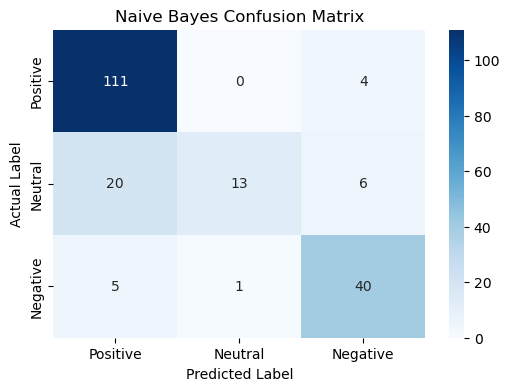

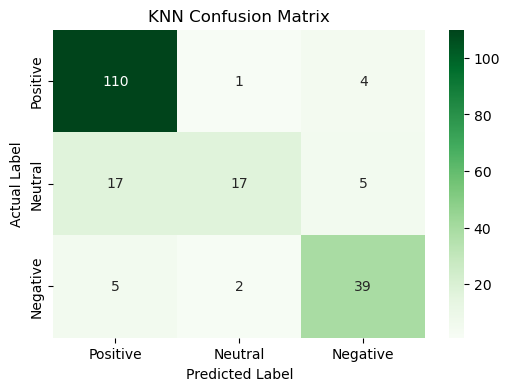

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes Confusion Matrix & Heatmap
nb_cm = confusion_matrix(test_df['label'], test_df['nb_predicted'], labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6,4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# KNN Confusion Matrix & Heatmap
knn_cm = confusion_matrix(test_df['label'], test_df['knn_predicted'], labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
